## Trabajo practico N°2: Regresion Lineal
### Integrantes: Maxim Dorogov  

In [1]:
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

### Preparacion del dataset

In [2]:
# Lectura del dataset
california_housing = fetch_california_housing()

# Obtenemos los atributos y el target:
X = california_housing.data
y = california_housing.target

# Transformamos los datos a estructuras de Pandas:
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos X e y; esto es útil para generar el mapa de calor de correlaciones
df_california = pd.concat([X, y], axis=1)

# Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X,  y, test_size=0.3, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(
    X_test_scaled, columns=california_housing['feature_names'])

In [3]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


1. **Obtener la correlación** entre los atributos y entre los atributos y el target.
    - ¿Qué atributo tiene mayor correlación lineal con el target? 
    - ¿Cuáles atributos parecen estar más correlacionados entre sí? Se pueden calcular los coeficientes de correlación o representarlos gráficamente mediante un mapa de calor.

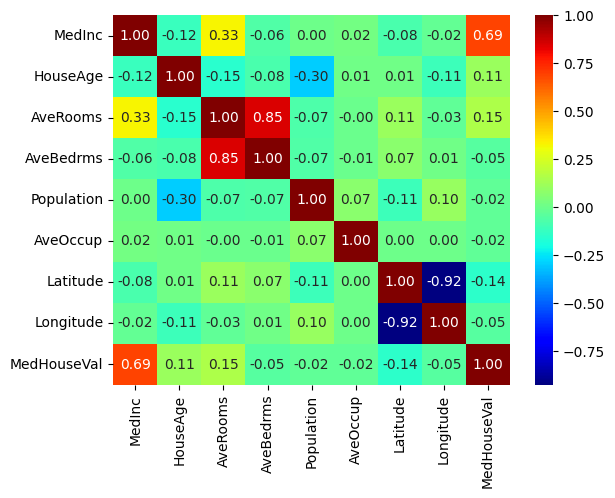

In [5]:
correlation = df_california.corr()
plt.figure()
sns.heatmap(
    correlation, 
    annot=True, 
    fmt=".2f",
    cmap='jet',
    annot_kws={"size": 10},  # Increased font size for annotations
    cbar=True)
plt.show()

- El atributo mas correlacionado con el target es MedInc, ingreso medio en el bloque. Y en 2do lugar la cantidad promedio de habitaciones, seguida por la latitud. En lo personal esperaba alta correlacion entre el target y la cantidad de habitaciones, la correlacion por la latitud se puede explicar por la geografia de California, siendo que para ciertas latitudes se encuentran zonas mas ricas que otras, y por lo tanto con un target que varia en funcion de la logitud.

- Los atributos mas correlacionados entre son son la latitud y la longitud seguidos por la cantidad de habitaciones y la cantidad de dormitorios. Las habitaciones y dormitorios son atributos que tienen una correlacion alta esperada ya que al haber mas habitaciones es logico que algunas se destinen a ser dormitorios. Para el caso de latitud y longitud la correlacion es alta ya que son coordenadas relacionadas entre si.

2. **Graficar los histogramas** de los distintos atributos y del target. 
- ¿Qué forma presentan los histogramas?
- ¿Alguno muestra una distribución similar a una campana que sugiera una distribución gaussiana, sin necesidad de realizar pruebas de hipótesis?

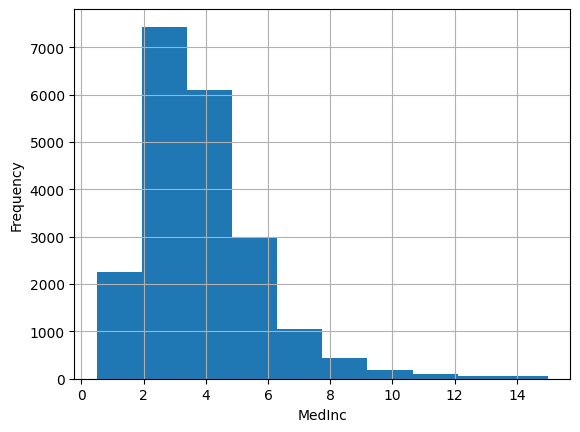

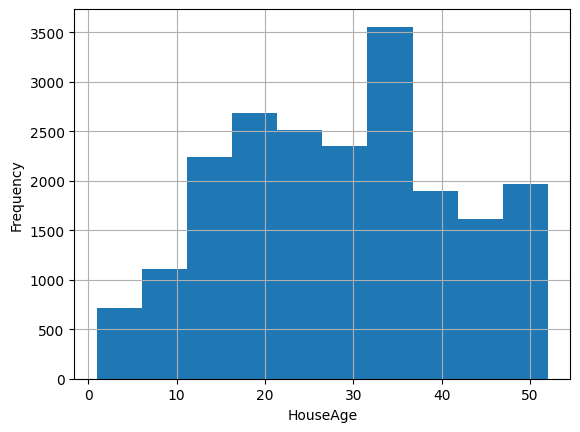

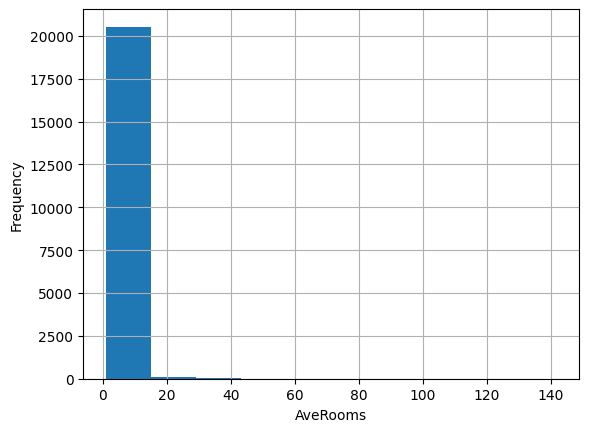

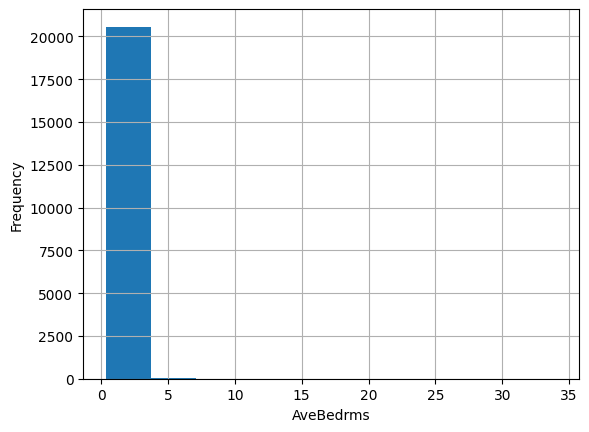

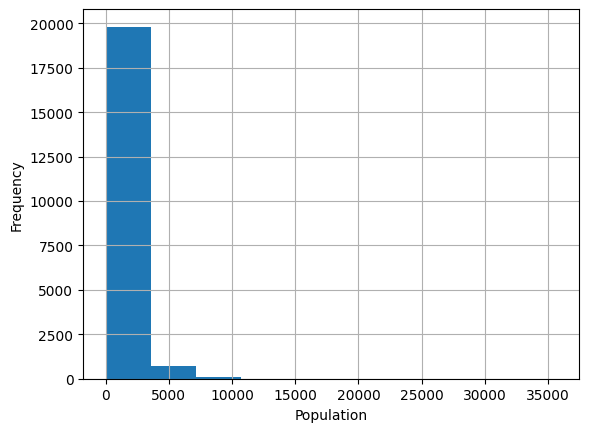

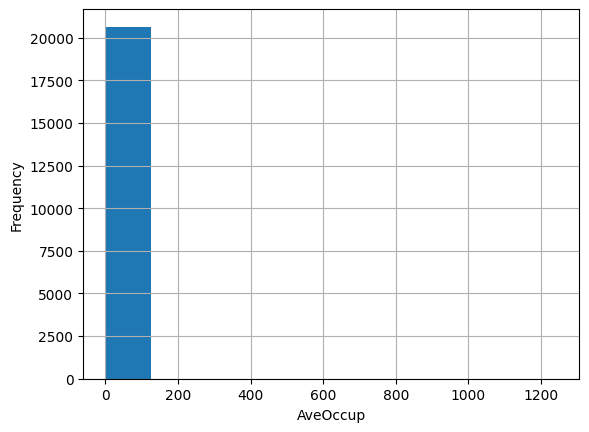

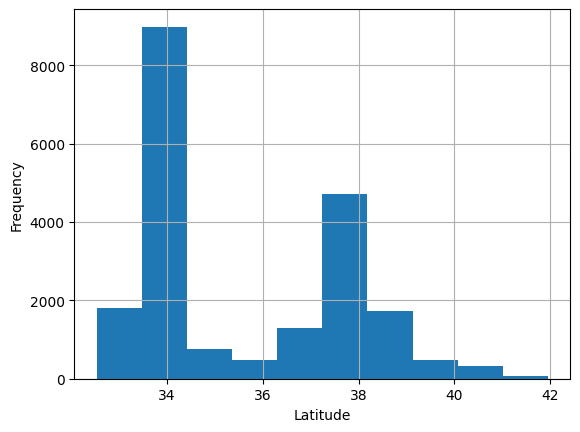

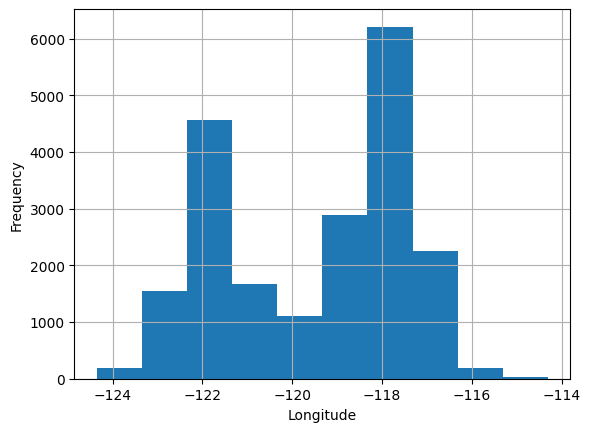

In [6]:
for feature_name in df_california.iloc[:, :-1]:
    df_california[feature_name].hist()
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

De los histogramas presentados el unico que podria asemejarse a ua distribucion conocida es MedInc, ingreso medio, que tiene una pinta de distribucion chi cuadrada. Era de esperarse que la cantidad de habitaciones iba a ser acotada al orden de las decenas. HouseAge tiene una distribucion 'casi' uniforme entre 10 y 50 anios con algun pico en torno a los 30.

3. **Calcular la regresión lineal** utilizando todos los atributos. 
    - Con el conjunto de entrenamiento, calcular la varianza total del modelo y la varianza explicada por el modelo.
    - ¿Está el modelo capturando adecuadamente el comportamiento del target? Fundamente su respuesta.

In [13]:
regresion = LinearRegression()
regresion.fit(X=X_train_scaled, y=y_train)

y_model = regresion.predict(X_train_scaled)
y_pred = regresion.predict(X_test_scaled)

n_features = len(X_train_scaled.columns)
explained_var = np.sum((y_model - y_train) ** 2) / (y_train.size - n_features - 1)
total_var = np.var(y_train)

print(f'Varianza total del conjunto de datos: {total_var}')
print(f'Varianza explicada: {explained_var}')

Varianza total del conjunto de datos: 1.3396959774719193
Varianza explicada: 0.5236838438457824


La varianza del modelo representa la dispersion de los residuos alrededor de la linea de regresion. EN este caso la varianza del modelo es baja y comparable a la varianza de los datos con lo cual podemos decir que el modelo captura adecuadamente el comportamiento.

4. **Calcular las métricas de MSE, MAE y R²** sobre el conjunto de evaluación.

In [8]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R_2: {r2_score(y_test, y_pred)}')

MSE: 0.5305677824766752
MAE: 0.5272474538305955
R_2: 0.5957702326061664


5. Crear una **regresión de Ridge**. 
    - Usar validación cruzada de 5 folds y tomar como métrica el MSE.
    - Buscar el mejor valor de α en el rango [0, 12.5].
    - Graficar el MSE en función de α.

Best MSE: 0.5252286630774725 for alpha: 4.25


Text(0, 0.5, 'Mean Squared Error')

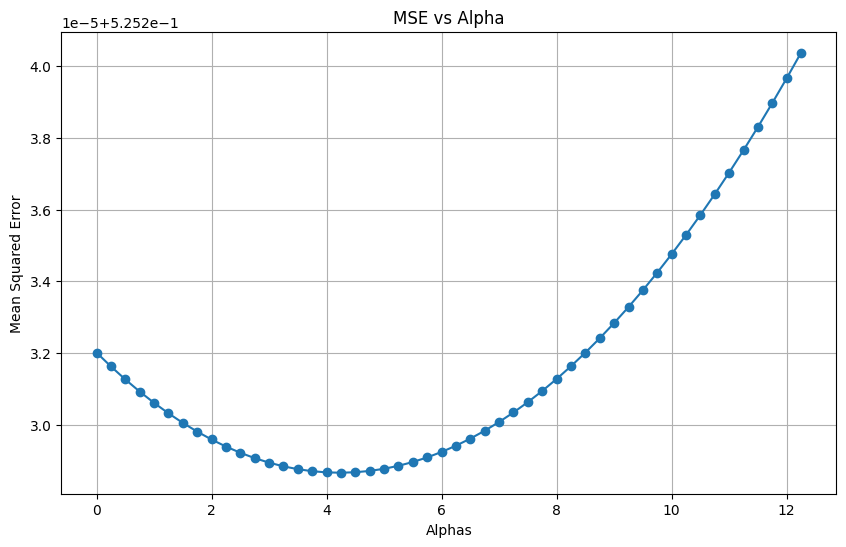

In [9]:
alphas = np.arange(0, 12.5, 0.25) 

kf = KFold(n_splits=5, shuffle=True, random_state=42)

total_mse = list()

for alpha in alphas:
    fold_mse = list()
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_train_fold, X_val_fold = X_train_scaled.iloc[train_idx, :], X_train_scaled.iloc[val_idx, :]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        if alpha == 0:
            ridge = LinearRegression()
        else:
            ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_fold, y_train_fold)

        y_pred_ridge = ridge.predict(X_val_fold)
        fold_mse.append(mean_squared_error(y_val_fold, y_pred_ridge))
    
    # Avegare MSE across folds for the current alpha
    total_mse.append(np.mean(fold_mse))

best_alpha = alphas[np.argmin(total_mse)]
print(f'Best MSE: {min(total_mse)} for alpha: {best_alpha}')

plt.figure(figsize=(10, 6))
plt.plot(alphas, total_mse, marker='o')
plt.title('MSE vs Alpha')
plt.grid('minor')
plt.xlabel('Alphas')
plt.ylabel('Mean Squared Error')

6. **Comparar los resultados** obtenidos entre la regresión lineal y la mejor regresión de Ridge, evaluando el conjunto de prueba.
    - ¿Cuál de los dos modelos obtiene mejores resultados en términos de MSE y MAE? ¿Poseen suficiente diferencia como para indicar si uno es mejor que el otro?
    - ¿Qué tipo de error podría haberse reducido?

In [10]:
# Tomamos el alpha que minimiza el MSE para Ridge y entrenamos el modelo
ridge = Ridge(alpha=best_alpha).fit(X_train_scaled, y_train)
# Obtenemos la regresion de Ridge
y_pred_ridge = ridge.predict(X_test_scaled)
# Obtenemos las metricas de MAE y MSE
print(f'MSE Ridge: {mean_squared_error(y_test, y_pred_ridge)}')
print(f'MAE Ridge: {mean_absolute_error(y_test, y_pred_ridge)}')

MSE Ridge: 0.5304674859640628
MAE Ridge: 0.527229660692246


Si comparamos los resultados obtenidos con el modelo de regresion lineal (`MSE: 0. 5305677824766752` y `MAE: 0.5272474538305955`) vemos que las diferencias son realmente infimas y no se puede afirmar que uno sea mejor que el otro en terminos de MSE y MAE. 
El modelo de Ridge es un modelo que podria mejorar el MSE en los casos donde hay muchas caracteristicas con corralacion alta entre si.